/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

The average accuracy of Logistic Regression using 5-fold cross-validation is: 0.9469824561403508
The average accuracy of K-Nearest Neighbors using 5-fold cross-validation is: 0.9363859649122807
The average accuracy of Support Vector Machine using 5-fold cross-validation is: 0.9361754385964913
The average accuracy of Decision Tree using 5-fold cross-validation is: 0.9390877192982456


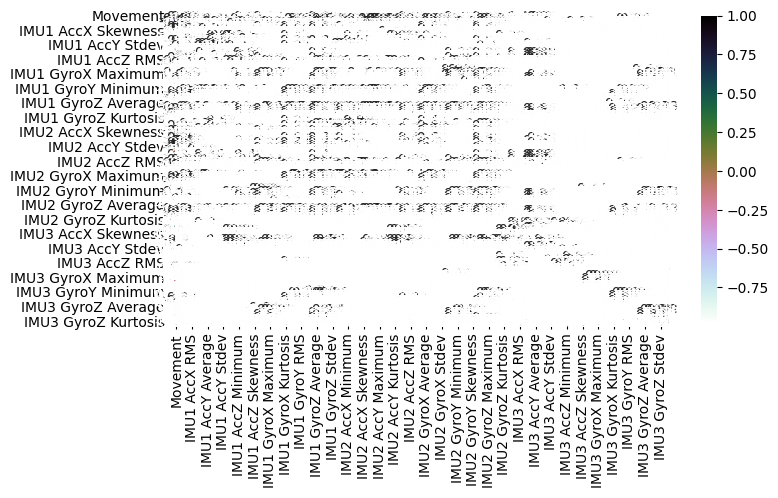

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
# Replace 'data.csv' with the actual path to your CSV file containing the data
data = pd.read_csv('data.csv')

# Split the data into features (X) and labels (y)
X = data.iloc[:, 1:]  # Assuming your label column is the first column
y = data.iloc[:, 0]   # Assuming your label column is named 'Movement'

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier()
}

# Perform K-fold cross-validation for each model
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True)

for name, model in models.items():
    accuracies = []  # To store accuracies for each fold
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Calculate average accuracy across all folds
    avg_accuracy = sum(accuracies) / k
    print(f'The average accuracy of {name} using {k}-fold cross-validation is: {avg_accuracy}')

# Additional visualization (optional)
plt.figure(figsize=(8, 4))
sns.heatmap(data.corr(), annot=True, cmap='cubehelix_r')
plt.show()


In [3]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
# load Iris Flower dataset
data = pd.read_csv('/content/drive/MyDrive/final.csv')

In [ ]:
data.head()

In [ ]:
data.info()

In [ ]:
iris.drop("Id", axis=1, inplace = True)

In [ ]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.model_selection  import train_test_split # to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn import svm # for suport vector machine algorithm
from sklearn import metrics # for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier # for using DTA

In [ ]:
iris.shape

In [ ]:
plt.figure(figsize=(8,4))
sns.heatmap(iris.corr(), annot=True, cmap='cubehelix_r') # draws heatmap with input as correlation matrix calculated by iris.corr()
plt.show() #similar analysis found
 # doing the colleration between the  to find out the factors in model

Splitting The Data into Training And Testing Dataset

In [ ]:
train, test = train_test_split(iris, test_size=0.3) # our main data split into train and test
# the attribute test_size=0.3 # rate of test splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

In [ ]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking the training data features
train_y = train.Species # output of the training data

test_X = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data feature
test_y = test.Species # output value of the test data

In [ ]:
train_X.head()

In [ ]:
test_X.head()

In [ ]:
train_y.head()

In [ ]:
Support Vector Machine SVM

In [ ]:
model = svm.SVC() # select the svm algorithm

# we train the algorithm with training data and training output
model.fit(train_X, train_y)

# we pass the testing data to the stored algorithm to predict the outcome
prediction = model.predict(test_X)
print('The accuracy of the SVM is: ', metrics.accuracy_score(prediction, test_y)) # we check the accuracy of the algorithm
#we pass the predicted output by the model and the actual output


conclusion

Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(prediction, test_y))

### Decision Tree

In [ ]:
model = DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(prediction, test_y))

### K-Nearest Neighbors

In [ ]:
model = KNeighborsClassifier(n_neighbors=3) # this examines 3 neighbors for putting the data into class
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of KNN is: ', metrics.accuracy_score(prediction, test_y))

###Let's check the accuracy for various values of n for K-Nearest nerighbours

In [ ]:
a_index = list(range(1,11))
a = pd.Series()
for i in list(range(1,11)):# find out the range for a atable perfoemance
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_y)))
plt.plot(a_index, a)
x = [1,2,3,4,5,6,7,8,9,10]
plt.xticks(x)# stable performence